In [185]:
#Imports
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import Input

from tensorflow.keras.layers import Layer,Lambda
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [86]:
#utility functions
# Progress bar function
from IPython.display import clear_output
def update_progress(progress):
    bar_length = 30
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( ">" * block + "-" * (bar_length - block), progress * 100)
    print(text)
    
    
class progress_bar(Callback):
    def __init__(self, num_epochs):
        self.num_epochs = num_epochs
    def on_epoch_end(self, epoch, logs=None):
            update_progress((epoch+1)/self.num_epochs)

In [140]:
#Set up data
x_train1 = np.random.normal(size =1000)
x_train2 = np.random.normal(size =1000)
x_train3 = np.random.normal(size =1000)

x_train = np.stack((x_train1,x_train2,x_train3)).T
y_train = x_train1 * 0.5 + x_train2 * 0.3 + x_train3 * 0.2 
x_train.shape

(1000, 3)

In [220]:
class LinearLayer(Layer):
    def __init__(self,shape):
        super(LinearLayer,self).__init__()
        self.m=self.add_weight(shape=shape,initializer='random_normal')
        self.b=self.add_weight(shape=shape,initializer='zeros')

    def call(self,inputs):
        self.add_metric(self.m[0], aggregation='mean', name='m0')
        self.add_metric(self.m[1], aggregation='mean', name='m1')
        self.add_metric(self.m[2], aggregation='mean', name='m2')
        return tf.reduce_sum(self.m*inputs+self.b,axis=1)
    
linear_regression =LinearLayer(shape=(3,))  

model = tf.keras.Sequential([linear_regression])

model.compile(optimizer='Adam',loss='mse')

num_epochs=1000
#define some callbacks
progress_bar1 =progress_bar(num_epochs)
stop =  tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

#fit the model
history = model.fit(x_train,y_train,epochs=num_epochs,callbacks=[progress_bar1,stop],verbose=False)
print('\ngradients :{}\nintercepts :{}\n'.format(linear_regression.m.numpy(),linear_regression.b.numpy()))
print(model.summary())


Progress: [>>----------------------------] 6.1%

gradients :[0.49999896 0.29999983 0.20000003]
intercepts :[-2.2816515e-08 -2.2816515e-08 -2.2816515e-08]

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
linear_layer_55 (LinearLayer (None,)                   6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


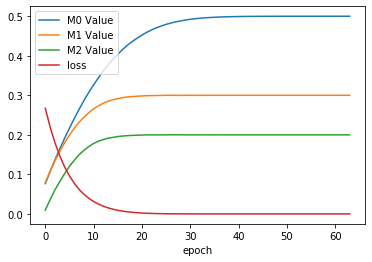

In [168]:
plt.plot(history.history['m0'],label='M0 Value')
plt.plot(history.history['m1'],label='M1 Value')
plt.plot(history.history['m2'],label='M2 Value')
plt.plot(history.history['loss'],label='loss')
plt.xlabel("epoch")
plt.legend()
plt.show()

In [179]:
model(np.array([[1,10,100]]))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([23.500002], dtype=float32)>

In [216]:
class LinearLayer2(Layer):
    def __init__(self):
        super(LinearLayer2,self).__init__()
        self.m0=self.add_weight(shape=(1,),initializer='random_normal')
        self.m1=self.add_weight(shape=(1,),initializer='random_normal')
        self.m2=self.add_weight(shape=(1,),initializer='random_normal')
        self.b=self.add_weight(shape=(1,),initializer='zeros')

    def call(self,inputs):
        input1,input2,input3 = inputs
        self.add_metric(self.m0, aggregation='mean', name='m0')
        self.add_metric(self.m1, aggregation='mean', name='m1')
        self.add_metric(self.m2, aggregation='mean', name='m2')
        return self.m0*input1+self.m1*input2+self.m2*input3+self.b

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer_1 = LinearLayer2()   
        
    def call(self, inputs):
        # Define forward pass
        x=self.layer_1(inputs)
        return x

model2 = MyModel()

model2.compile(optimizer='Adam',loss='mse')

num_epochs=1000
#define some callbacks
progress_bar1 =progress_bar(num_epochs)
stop =  tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

#fit the model
history2 = model2.fit([x_train1,x_train2,x_train3],y_train,epochs=num_epochs,callbacks=[progress_bar1,stop],verbose=False)
print('\ngradients :{}\nintercepts :{}\n'.format(linear_regression.m.numpy(),linear_regression.b.numpy()))
print(model2.summary())

Progress: [>>----------------------------] 7.0%

gradients :[0.49999896 0.29999986 0.20000003]
intercepts :[-1.5210407e-08 -1.5210407e-08 -1.5210407e-08]

Model: "my_model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
linear_layer2_8 (LinearLayer multiple                  4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
None


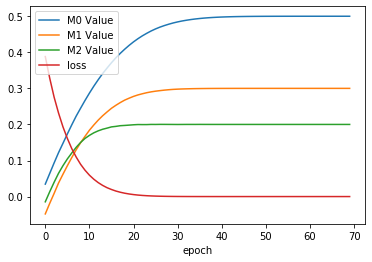

In [218]:
plt.plot(history2.history['m0'],label='M0 Value')
plt.plot(history2.history['m1'],label='M1 Value')
plt.plot(history2.history['m2'],label='M2 Value')
plt.plot(history2.history['loss'],label='loss')
plt.xlabel("epoch")
plt.legend()
plt.show()

1 2
